<a href="https://colab.research.google.com/github/Echevarriaj93/gradwork2022/blob/main/Jose_Echevarria_Copy_of_Assignment2_Numpy_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment for Numpy Basics Study Unit

These coding questions are designed to test whether you are ready to move on to the remainder of this course. They test your knowledge of Numpy fundamentals (what you learned in this study unit).

Please make sure:
- you read and follow the instructions and comments closely;
- you do not change the provided code in anyway;
- you DO NOT copy any code from any source;
- you provide enough comments/pseudo code for your code.

## import dependencies you would need

Here all the required packages are imported for you. You __DO NOT__ need any other packages for this assignment. 

You can refer to _Lecture04-Computation-on-arrays-aggregates_ for any mathematical functions needed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
np.random.seed(42)

## preparing data

The data you are playing here are machine running time for training certain Artificial Intelligence model (in Seconds). The model was trained ``100`` times on ``10`` different machines, and we record the running time in a $ 100\times 10 $ Numpy array.

In [ ]:
# this function generates our data
def generate(median=510, err=20, outlier_err=100, size=80, outlier_size=10):
    errs = err * np.random.rand(size) * np.random.choice((-1, 1), size)
    data = median + errs

    lower_errs = outlier_err * np.random.rand(outlier_size)
    lower_outliers = median - err - lower_errs

    upper_errs = outlier_err * np.random.rand(outlier_size)
    upper_outliers = median + err + upper_errs

    data = np.concatenate((data, lower_outliers, upper_outliers))
    np.random.shuffle(data)

    return np.around(data, decimals=3)

In [ ]:
# we call above function to generate the data
running_times = []
for i in range(10):
    data = generate()
    running_times.append(data)
running_times = np.array(running_times)
running_times

array([[496.75 , 513.636, 497.763, 509.312, 525.425, 524.161, 516.234,
        520.401, 511.481, 515.619, 493.351, 491.022, 513.993, 514.247,
        511.77 , 478.995, 506.88 , 521.973, 492.676, 524.58 , 520.934,
        467.206, 516.092, 507.21 , 526.309, 503.493, 515.176, 498.152,
        490.608, 502.226, 504.573, 502.831, 497.978, 520.854, 513.12 ,
        566.363, 506.303, 447.289, 526.575, 513.974, 506.08 , 490.687,
        519.904, 510.929, 497.849, 515.843, 500.879, 499.715, 525.445,
        403.927, 438.925, 499.505, 600.302, 501.197, 508.699, 507.559,
        627.178, 511.162, 563.762, 507.182, 517.135, 512.317, 494.296,
        489.305, 526.168, 510.11 , 504.175, 562.32 , 541.987, 513.668,
        510.412, 400.391, 508.509, 502.673, 511.953, 503.915, 624.291,
        524.137, 498.042, 526.044, 458.2  , 490.262, 506.59 , 491.814,
        491.21 , 571.741, 501.361, 502.509, 408.199, 492.103, 552.211,
        581.879, 510.905, 409.256, 491.563, 524.64 , 490.986, 496.315,
      

## Task 0: Flatten the Array (6 points)

We need to make the data a $1 \times 1000$ array.

In [ ]:
 #setting flttening the list of arrays by making it one dimensional with reshape()
#When an array is to be one dimensional only 1 specification needs to be called. 
#In this case it the number of rows

# running_times_data = running_times.reshape(1000) 
# running_times_data.shape

running_times_data = running_times.ravel()

running_times_data.shape


(1000,)

In [ ]:
# run this code - if you see an error, something is wrong above
assert running_times_data.shape[0] == 1000

## Task 1: Scaling Your Data (18 points)

In data analytics, we want all the data we used in the same range - the most popular range we used being ``[0, 1]``.

Now we need to scale ``running_time_data`` into that range. We are going to use the _min-max transformation_ shown in the following formula to implement it.

$$ x' = \frac{x_i - x_{min}}{x_{max} - x_{min}} $$

In which, $x_i$ is the $i^{th}$ element in the data, $x_{max}$ is the maximal value in your data, and $x_{min}$ is the minimal value in your data.

You are going to write a function (``my_minmax()``) to transform ``running_time_data``.

In [ ]:
# first we need to define a function to get the min and max of an array
# complete the function here
def get_minmax(arr):

  #here i call the minimum and max values in the array
    return(np.min(arr), np.max(arr)) # complete the code here
# call your function on `running_times_data` to get `x_min` and `x_max`
x_min, x_max = get_minmax(running_times_data) # complete the code here
x_min, x_max

(390.231, 629.414)

In [ ]:
# now we can use the results from above to do min-max transformation
def my_minmax(x, x_max, x_min):

  #below I take the values in the array and subtract the minmum values from all values
  #then divide by the (max - min values) to get the scaled values.

    return((x - x_min)/ (x_max- x_min)) # complete the code here
# call your function on `running_times_data[0]` to test of the function works
# you may need your calculator to verify the results
# do not forget to input `x_min` and `x_max` as parameters of `my_minmax()`

my_minmax(running_times_data[0], x_min, x_max)

0.5546548040621616

In [ ]:
# run this code - if you see an error, something is wrong above
assert my_minmax(running_times_data[0], x_max, x_min) == 0.44534519593783845

If every thing is okay above, we can apply our ``my_minmax`` function on `running_times_data`, and we store the data as `running_times_scaled`.

In [ ]:
#Now that I have tested the function on the first value in the array successfully
#I can now apply the function to the entire array
running_times_scaled = my_minmax(running_times_data, x_max, x_min)

#The array was scaled successfully with values in the range 0-1
running_times_scaled

array([0.4453452 , 0.51594386, 0.44958045, 0.49786565, 0.56523248,
       0.55994782, 0.52680583, 0.54422764, 0.50693402, 0.52423458,
       0.43113432, 0.42139701, 0.51743644, 0.51849839, 0.5081423 ,
       0.37111333, 0.4876977 , 0.55080002, 0.42831221, 0.56169962,
       0.54645606, 0.32182471, 0.52621215, 0.4890774 , 0.56892839,
       0.473537  , 0.52238244, 0.45120682, 0.41966611, 0.4682398 ,
       0.47805237, 0.47076924, 0.45047934, 0.54612159, 0.51378651,
       0.73639013, 0.48528533, 0.23855374, 0.57004051, 0.517357  ,
       0.48435298, 0.4199964 , 0.54214973, 0.50462616, 0.44994   ,
       0.5251711 , 0.46260813, 0.45774156, 0.5653161 , 0.05726159,
       0.2035847 , 0.45686357, 0.87828566, 0.46393765, 0.49530276,
       0.49053653, 0.99065151, 0.50560031, 0.72551561, 0.48896034,
       0.53057282, 0.51042925, 0.43508527, 0.4142184 , 0.56833889,
       0.50120201, 0.47638837, 0.71948675, 0.63447653, 0.51607765,
       0.50246464, 0.04247794, 0.49450839, 0.47010866, 0.50890

### Test the results 

After scaling, you should have all your data within the `[0, 1]` range.

We can test if that is true by:

- getting the new minimum (``new_min``) and new maximum (``new_max``) for ``running_times_scaled``.
- check if ``new_min >= 0`` and  ``new_max <=1``.

In [ ]:
#The code below will assign the scaled min and max values to the variables listed
new_min, new_max = min(running_times_scaled), max(running_times_scaled) # complete the code here

In [ ]:
# run this code - if you see an error, something is wrong above
assert (new_min >= 0) and (new_max <=1)

## Task 2: Outlier Detection (26 points)

An _outlier_ is an observation that lies an abnormal distance from other values in a random sample from a population ([source](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)). Most of the machine learning techniques are somewhat sensitive toward outliers - meaning they function weirdly when your data contains outliers.

<img src='https://assets.sutori.com/user-uploads/image/9a95f111-4c28-4a9b-b5b4-b37a16a6e6e6/c727292ca2c78a455974038103a1ee19.gif' />

Thus, we need to handle outliers when we prepare the data for modeling. One approach to handle the outliers is called the interquatile range (IQR) method. The method works as follows:
1. determine the _lower quartile_ ($Q_1$, aka. the $25^{th}$ quantile) and the _upper quartile_ ($Q_3$, aka. the $75^{th}$ quantile) of the data;
2. determine the IQR: $ IQR = Q_3 - Q1 $; 
3. determine the lower and upper bound of the data for outliers. The lower nd upper bound are determined by: $$bound_{low} = Q_1 - 1.5 \times IQR $$, $$bound_{up} = Q_3 + 1.5 \times IQR $$
4. Any data out of the range are outliers - for values higher than $bound_{up}$, replace them with $bound_{up}$; for values lower than $bound_{low}$, replace them with $bound_{low}$.

Now let's implement them with the help of Numpy.

### step 1: determine the lower and upper quartile

You can use ``np.quantile()`` on `running_times_data` for this - keep in mind you need the $25^{th}$ (0.25) and the $75^{th}$ quantile. 

In [ ]:
#The first quartile is the value under which 25% of the data points in the array 
#fall under



#assuming the function sorts the point from least to greatest
q1 = np.quantile(running_times_data, .25) # complete your code here

#The 3rd quartile is the value in which 75% of the data points fall under

q3 = np.quantile(running_times_data, .75) # complete your code here

q1, q3

(497.1755, 520.97675)

### Step 2: calculate the IQR 

In [ ]:
#The interquartile range will provide with the middle 50% of values.
#This will help us by ignoring outliers in the data

#*Take the bottom 75% and substract from it the bottom 25%

iqr = q3 - q1 # complete the code here

iqr

23.80125000000004

### Step 3: calculate the lower and upper bound

In [ ]:
#calculating the lower and upper bounds to set new values for outliers

#The lower bound is the lowest value in the iqr
bound_low = q1 - 1.5 * iqr # complete your code here

#The upper bound is the kargest value in the iqr
bound_up = q3 + 1.5 * iqr # complete your code here
bound_low, bound_up

(461.47362499999997, 556.6786250000001)

### Step 4: Outliers detection and replacing

We can use ``np.where()`` to detect and replace outliers in one shot. Below is an example of using ``np.where()`` - please observe how the example works and use it to write your own code.

In [ ]:
a1 = np.array([1, 2, 3, 4])
a1 = np.where(a1>3, 3, a1)
a1 = np.where(a1<2, 2, a1)
a1

array([2, 2, 3, 3])

In [ ]:
# write your code to replace outliers in `running_times_data`
# first we create a copy to preserve the original data with outlier for comparison
running_times_iqr = running_times_data.copy() 

#Same format as example above. Replacing values above and below the specified
#Conditions and replacing with the desired upper and lower bound values

 # Where the value fall above the upper bound value replace them with the upper bound value
running_times_iqr = np.where(running_times_iqr > bound_up, bound_up, running_times_iqr)

 # Where the values fall below the lower bounds replace them with the lower bound value
running_times_iqr = np.where(running_times_iqr < bound_low, bound_low, running_times_iqr) 

In [ ]:
#The new min and max are the lower and upper bounds respectively
running_times_iqr.min(), running_times_iqr.max() #confirming lower bounds and upper bounds have been replaced outliers in the lower and upper ends of the data

(461.47362499999997, 556.6786250000001)

Now we can compare how did we do on replacing the outliers.

Text(0.5, 1.0, 'data without outliers')

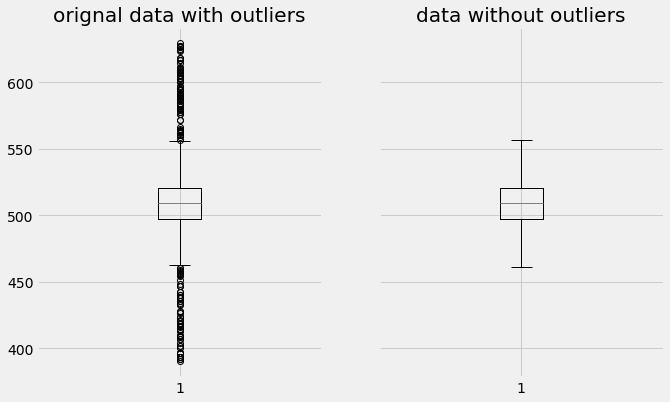

In [ ]:
# run this code to see the difference

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6)) #set for two graphs sharing the y axis and set size of 10 x 6 
ax1.boxplot(running_times_data) #the first boxplot of the original data
ax1.set_title('orignal data with outliers') #title for boxplot 1
ax2.boxplot(running_times_iqr) #the second boxplot using the iqr
ax2.set_title('data without outliers') #title 2

## Answer the question:
 
Can you observe the difference above? Research on boxplots and explain the figure above. [This link](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) might be helpful.

##We no longer see any values below the lower bounds or above the upper bounds in the box plot on the right. The values that were removed represented outliers or out of the ordinary values that won't apply to normal situations/conditions.This should help us when creating models. The interquartile range is useful for eliminating outliers because the middle 50% of data is not likely to be skewed by them. 